In [7]:
#聚类算法
#1.分布方法---最大期望算法，高斯混合聚类
#2.质心点方法----K均值算法
#3.密度方法----基于密度带噪声的空间聚类应用算法（DBSCAN）、均值漂移
#4.层次方法----分割聚类、合并聚类

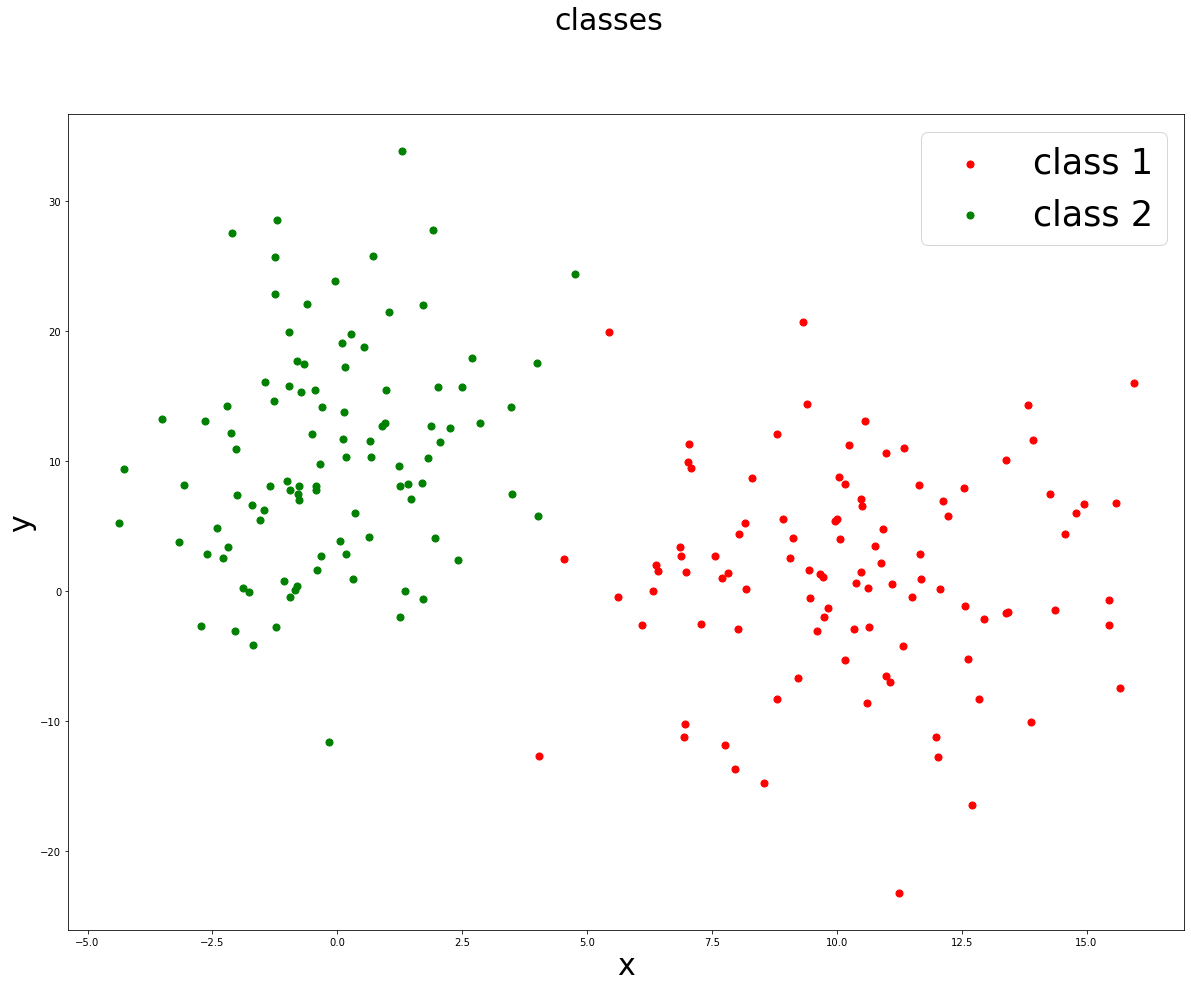

In [10]:
################################聚类方法的训练和对比###############################
#生成数据点，并绘制散点图
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(4771)                            #设置随机种子
c1 = np.random.multivariate_normal([10,0],[[3,1],[1,4]],size = [100,])
l1 = np.zeros(100)
l2 = np.ones(100)                 
c2 = np.random.multivariate_normal([0,10],[[3,1],[1,4]],size = [100,])#生成指定维度且服从正态分布的数组
np.random.seed(1)                               #设置随即种子，生成噪音数据（服从正态分布）
noise1x = np.random.normal(0,2,100)
noise1y = np.random.normal(0,8,100)
noise2 = np.random.normal(0,8,100)
c1[:,0] += noise1x
c1[:,1] += noise1y
c2[:,1] += noise2
fig = plt.figure(figsize = (20,15))             #初始化fig对象
ax = fig.add_subplot(111)                   
ax.set_xlabel('x',fontsize = 30)                #设置标签参数
ax.set_ylabel('y',fontsize = 30)       
fig.suptitle('classes',fontsize = 30)           #设置标题参数
labels = np.concatenate((l1,l2),)               #数组拼接,默认横向拼接
X = np.concatenate((c1,c2),)
pp1 = ax.scatter(c1[:,0],c1[:,1],cmap = 'prism',s = 50,color = 'r')
pp2 = ax.scatter(c2[:,0],c2[:,1],cmap = 'prism',s = 50,color = 'g')
ax.legend((pp1,pp2),('class 1','class 2'),fontsize = 35)
fig.savefig('./src/classes.png')

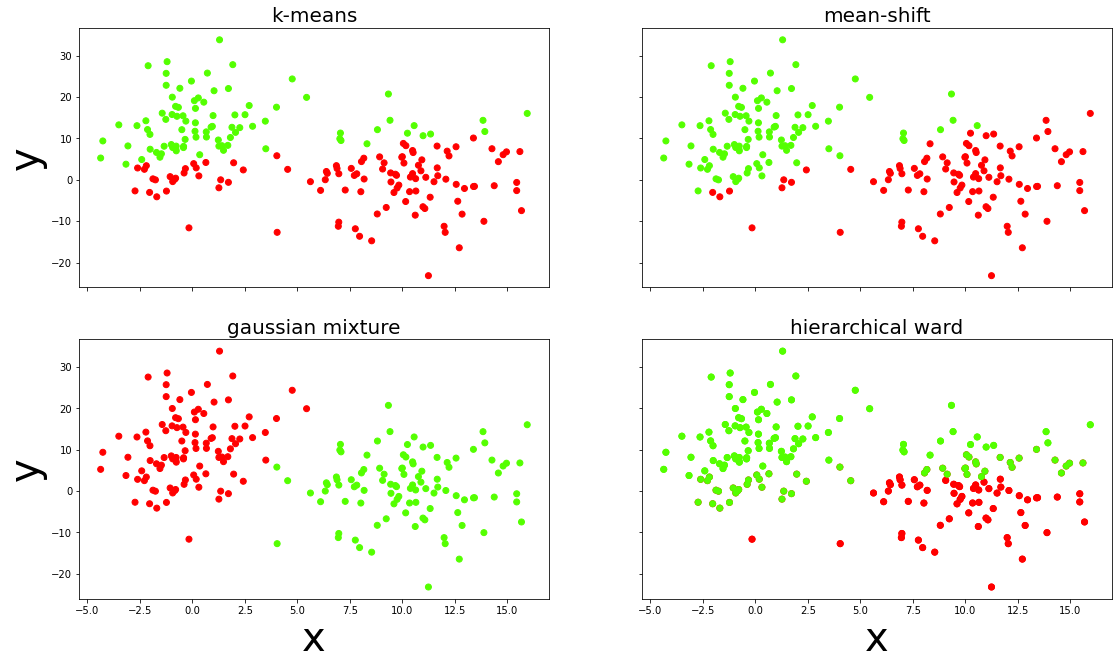

In [21]:
import numpy as np
from sklearn import mixture
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt

fig.clf()
fig,((axis1,axis2),(axis3,axis4)) = plt.subplots(2,2,sharex = 'col',sharey = 'row')

kmeans = KMeans(n_clusters = 2)                 #K均值算法,设置初始簇为2
kmeans.fit(X)                                   #K均值算法对数据进行拟合
pred_kmeans = kmeans.labels_                    
plt.scatter(X[:,0],X[:,1],c = kmeans.labels_,cmap = 'prism')#绘制散点图
axis1.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='prism')
axis1.set_ylabel('y',fontsize = 40)
axis1.set_title('k-means',fontsize=20)

ms = MeanShift(bandwidth = 7)                   #均值漂移，设置初始带宽为7
ms.fit(X)                                       #拟合
pred_ms = ms.labels_                            #得到均值漂移算法的预测结果
axis2.scatter(X[:,0],X[:,1],c=pred_ms,cmap='prism')
axis2.set_title('mean-shift',fontsize = 20)

g = mixture.GaussianMixture(n_components=2)     #高斯混合模型，初始值为2
g.fit(X)                                        #使用模型进行拟合
pred_gmm = g.predict(X)                         #模型预测
axis3.scatter(X[:,0],X[:,1],c=pred_gmm,cmap='prism')#绘制散点图
axis3.set_xlabel('x',fontsize=40)
axis3.set_ylabel('y',fontsize=40)
axis3.set_title('gaussian mixture',fontsize = 20)

Z = linkage(X,'ward')                            #层次聚类，使用ward链接
max_d = 110                                      #终止算法最大距离
pred_h = fcluster(Z,max_d,criterion='distance')  #层次聚类预测
axis4.scatter(X[:,0],X[:,1],c=pred_h,cmap='prism')#绘制散点图
axis4.set_xlabel('x',fontsize=40)
axis4.set_title('hierarchical ward',fontsize=20)
fig.set_size_inches(18.5,10.5)
fig.savefig('./src/comp_clusteringh.png',dpi=100)


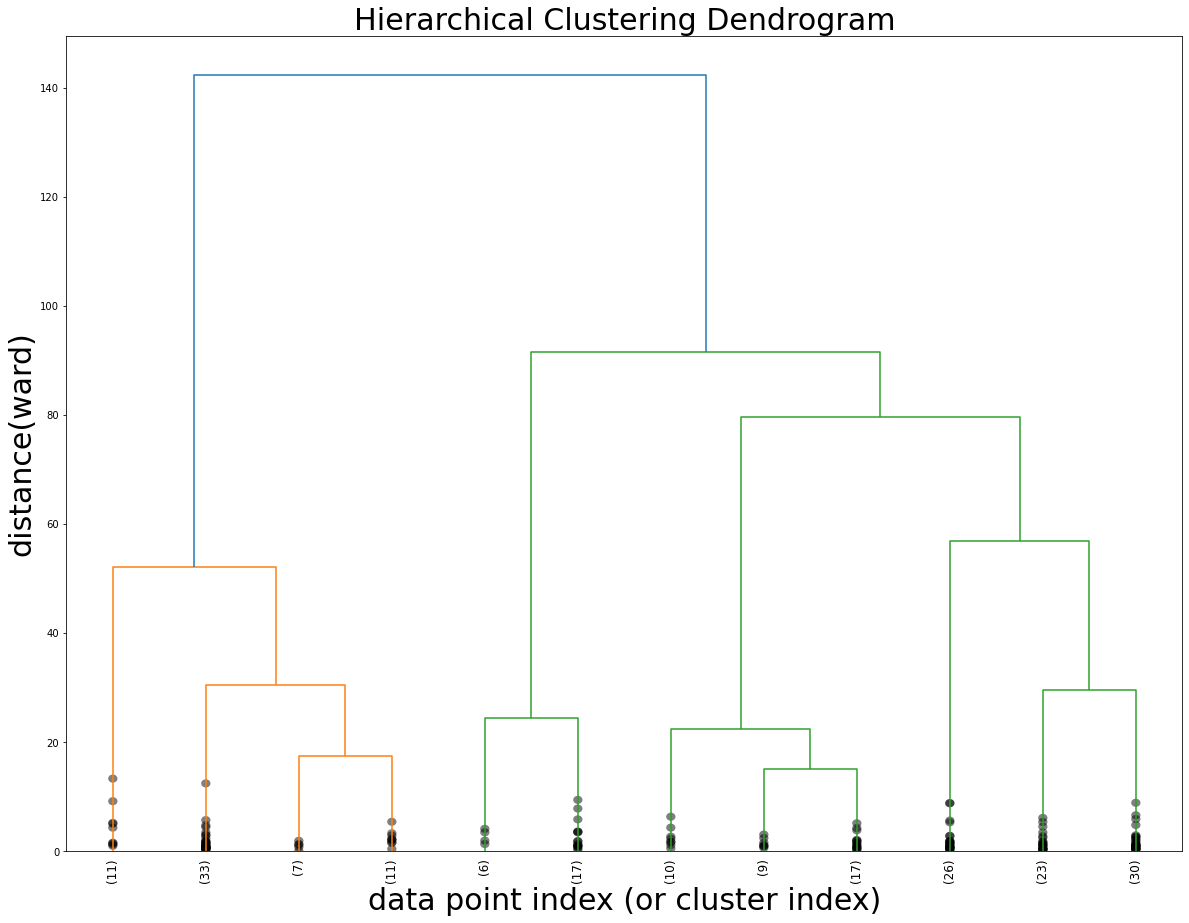

In [25]:
from scipy.cluster.hierarchy import dendrogram
fig = plt.figure(figsize = (20,15))
plt.title('Hierarchical Clustering Dendrogram',fontsize=30)
plt.xlabel('data point index (or cluster index)',fontsize=30)
plt.ylabel('distance(ward)',fontsize=30)  #绘制树状图
dendrogram(                               #设置参数
    Z,
    truncate_mode='lastp',                #只显示最后一次合并的簇
    p = 12,
    leaf_rotation = 90.,
    leaf_font_size = 12.,
    show_contracted = True,
)
fig.savefig('./src/dendrogram.png')

In [26]:
#评估聚类方法的效果，（需要用到每个数据点的实际类别，即外部验证机制）
#v-measure（同质性和完整性的调和平均数）
#完整性(衡量同一类别所有数据点是否划分到同一个簇中)
#同质性（每个簇是否只包含同一类别的数据点）

#轮廓系数,仅使用聚类算法用到的数据，计算每个数据点与同簇数据点和其他簇数据点之间的相似度

from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score
#分别对四个聚类算法得到的结果计算v-measure、完整性、同质性以及轮廓系数
res = homogeneity_completeness_v_measure(labels,pred_kmeans)
print('kmeans measures, homogeneity:',res[0],' completeness:',res[1],' v-measure:',res[2],' silhouette score:',silhouette_score(X,pred_kmeans))
res = homogeneity_completeness_v_measure(labels,pred_ms)
print('mean-shift measures, homogeneity:',res[0],' completeness:',res[1],' v-measure:',res[2],' silhouette score:',silhouette_score(X,pred_ms))
res = homogeneity_completeness_v_measure(labels,pred_gmm)
print('gaussian mixture model measures, homogeneity:',res[0],' completeness:',res[1],' v-measure:',res[2],' silhouette score:',silhouette_score(X,pred_gmm))
res = homogeneity_completeness_v_measure(labels,pred_h)
print('hierarchical (ward) measures, homogeneity:',res[0],' completeness:',res[1],' v-measure:',res[2],' silhouette score:',silhouette_score(X,pred_h))


kmeans measures, homogeneity: 0.27296066856586043  completeness: 0.27536904425239395  v-measure: 0.27415956737106134  silhouette score: 0.42477150354184795
mean-shift measures, homogeneity: 0.5978208097977263  completeness: 0.5978208097977263  v-measure: 0.5978208097977263  silhouette score: 0.4184266394561129
gaussian mixture model measures, homogeneity: 0.9192068641040878  completeness: 0.9192068641040878  v-measure: 0.9192068641040878  silhouette score: 0.3986568945693081
hierarchical (ward) measures, homogeneity: 0.3703771161773574  completeness: 0.41467546163991537  v-measure: 0.3912764723573831  silhouette score: 0.36685040851464007


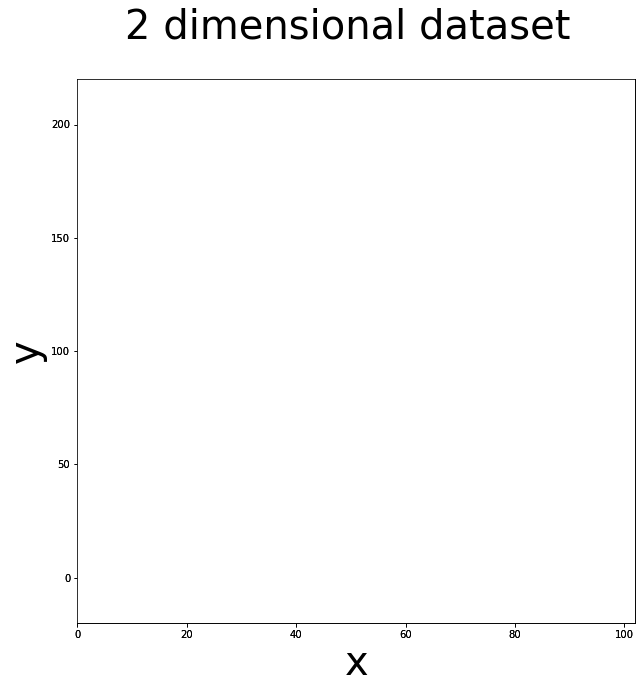

In [33]:
###########################主成分分析法PCA##########################################
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
x = np.arange(1,101,1).astype(float)                  #生成x,y，其中y = 2*x
y = 2*np.arange(1,101,1).astype(float)
#add noise
noise = np.random.normal(0, 10, 100)                   #添加噪声数据
y += noise

fig = plt.figure(figsize=(10,10))                      #绘制矢量图
plt.plot(x,y,'ro')
plt.axis([0,102, -20,220])
plt.quiver(60, 100,10-0, 20-0, scale_units='xy', scale=1)
plt.arrow(60, 100,10-0, 20-0,head_width=2.5, head_length=2.5, fc='k', ec='k')
plt.text(70, 110, r'$v^1$', fontsize=20)

ax = fig.add_subplot(111)                              #设置图像的参数
ax.axis([0,102, -20,220])
ax.set_xlabel('x',fontsize=40)
ax.set_ylabel('y',fontsize=40)
fig.suptitle('2 dimensional dataset',fontsize=40)
fig.savefig('./src/pca_data.png')

In [40]:
mean_x = np.mean(x)                       #计算数据集的均值以及漂移后的均值
mean_y = np.mean(y)
u_x = (x-mean_x)/np.std(x)
u_y = (y-mean_y)/np.std(y)
sigma = np.cov([u_x,u_y])

eig_vals,eig_vecs = np.linalg.eig(sigma)  #计算特征值以及特征向量，选择特征值最大的特征向量
eig_paris = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_paris.sort()
eig_paris.reverse()
v1 = eig_paris[0][1]
print(v1)

x_v1 = v1[0]*np.std(x)+mean_x             #为了确认主成分是否按照预期沿直线分布，将坐标调整回去
y_v1 = v1[1]*np.std(y)+mean_y
print('slope:',(y_v1-1)/(x_v1-1))

X = np.array([u_x,u_y])                   #将调整后的数据转化为矩阵格式
X = X.T
print(X.shape)

from sklearn.decomposition import PCA    #使用sklearn库中的PCA算法实现，得到的结果与前一种相同
pca = PCA(n_components=1)
pca.fit(X)
v1_sklearn = pca.components_[0]
print(v1_sklearn)

X_red_sklearn = pca.fit_transform(X)      #将数据集转换到新的一维空间
W = np.array(v1.reshape(2,1))
X_red = W.T.dot(X.T)
assert X_red.T.all() == X_red_sklearn.all(),'problem with the pca algorithm'
print(X_red.T[0],'-',X_red_sklearn[0])

[-0.70710678 -0.70710678]
slope: 2.021643957864135
(100, 2)
[-0.70710678 -0.70710678]
[2.52744874] - [2.52744874]
